* id - id of individual
* age - age of individual
* sex - gender of individual
* fracture - fracture status of individual
* weight_kg - weight in kg of individual
* height_cm - height in cm of individual
* medication - medication individual is on
* waiting_time - No information
* bmd - bone mineral density of individual

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the necessary Libararies

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Loading the Datasets

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/bmd.csv")

Displaying the first five rows of the dataset

In [ ]:
df.head()

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909


Displaying the last five rows of the dataset

In [ ]:
df.tail()

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
164,21892,77.982543,M,fracture,74.0,164.0,No medication,49,0.7941
165,24140,50.285303,F,fracture,59.0,161.0,No medication,6,0.7971
166,6969,46.359721,M,fracture,67.0,169.0,No medication,10,0.8037
167,5505,54.788368,M,fracture,70.0,166.0,No medication,14,0.8072
168,71,69.994822,F,fracture,68.5,165.0,No medication,25,0.8664


In [ ]:
df.isna()

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
164,False,False,False,False,False,False,False,False,False
165,False,False,False,False,False,False,False,False,False
166,False,False,False,False,False,False,False,False,False
167,False,False,False,False,False,False,False,False,False


In [ ]:
df.shape

(169, 9)

In [ ]:
df.columns

Index(['id', 'age', 'sex', 'fracture', 'weight_kg', 'height_cm', 'medication',
       'waiting_time', 'bmd'],
      dtype='object')

In [ ]:
df.drop(['id', 'waiting_time'], axis=1,inplace=True)

In [ ]:
df['age'] = df['age'].astype(int)

In [ ]:
df.head(10)

,age,sex,fracture,weight_kg,height_cm,medication,bmd
0,57,F,no fracture,64.0,155.5,Anticonvulsant,0.8793
1,75,F,no fracture,78.0,162.0,No medication,0.7946
2,70,M,no fracture,73.0,170.5,No medication,0.9067
3,78,F,no fracture,60.0,148.0,No medication,0.7112
4,54,M,no fracture,55.0,161.0,No medication,0.7909
5,77,M,no fracture,65.0,168.0,No medication,0.7301
6,56,M,no fracture,77.0,159.0,No medication,1.0096
7,49,F,no fracture,59.0,150.0,No medication,0.7310
8,68,M,no fracture,64.0,167.0,Glucocorticoids,0.6893
9,66,M,no fracture,72.0,159.5,No medication,0.9466


Now find Unique categorical Values

In [ ]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
df['fracture'].unique()

array(['no fracture', 'fracture'], dtype=object)

In [ ]:
df['medication'].unique()

array(['Anticonvulsant', 'No medication', 'Glucocorticoids'], dtype=object)

Convert the categorical values to numerical values for ML prediction

In [ ]:
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['fracture'] = label_encoder.fit_transform(df['fracture'])
df['medication'] = label_encoder.fit_transform(df['medication'])
df.head(10)

,age,sex,fracture,weight_kg,height_cm,medication,bmd
0,57,0,1,64.0,155.5,0,0.8793
1,75,0,1,78.0,162.0,2,0.7946
2,70,1,1,73.0,170.5,2,0.9067
3,78,0,1,60.0,148.0,2,0.7112
4,54,1,1,55.0,161.0,2,0.7909
5,77,1,1,65.0,168.0,2,0.7301
6,56,1,1,77.0,159.0,2,1.0096
7,49,0,1,59.0,150.0,2,0.7310
8,68,1,1,64.0,167.0,1,0.6893
9,66,1,1,72.0,159.5,2,0.9466


Check to see if the transformation has happenned

In [ ]:
df['sex'].unique()

array([0, 1])

In [ ]:
df['fracture'].unique()

array([1, 0])

In [ ]:
df['medication'].unique()

array([0, 2, 1])

Checking to see if there are any Null Values, If yes then you need to fill them or remove them based on the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         169 non-null    int64  
 1   sex         169 non-null    int64  
 2   fracture    169 non-null    int64  
 3   weight_kg   169 non-null    float64
 4   height_cm   169 non-null    float64
 5   medication  169 non-null    int64  
 6   bmd         169 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 9.4 KB


As there are no null values check to see is there any duplicates

In [ ]:
df.duplicated().sum()

0

Let us describe the dataset and transpose it for easy visualisation

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,169.0,63.124260,12.332301,35.0000,54.0000,63.0000,72.0000,88.0000
sex,169.0,0.508876,0.501407,0.0000,0.0000,1.0000,1.0000,1.0000
fracture,169.0,0.704142,0.457784,0.0000,0.0000,1.0000,1.0000,1.0000
weight_kg,169.0,64.665680,11.537171,36.0000,56.0000,64.5000,73.0000,96.0000
height_cm,169.0,160.254438,7.928272,142.0000,154.0000,160.5000,166.0000,177.0000
medication,169.0,1.751479,0.543151,0.0000,2.0000,2.0000,2.0000,2.0000
bmd,169.0,0.783104,0.166529,0.4076,0.6708,0.7861,0.8888,1.3624


Removing the outliers

In [ ]:
from scipy import stats
import numpy as np
numerical_cols = ['age', 'weight_kg', 'height_cm',
       'bmd']
z_scores = np.abs(stats.zscore(df[numerical_cols]))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_no_outliers = df[~outliers]

In [ ]:
df_no_outliers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,168.0,63.089286,12.360760,35.0000,54.0000,63.0000,72.0000,88.0000
sex,168.0,0.505952,0.501459,0.0000,0.0000,1.0000,1.0000,1.0000
fracture,168.0,0.702381,0.458578,0.0000,0.0000,1.0000,1.0000,1.0000
weight_kg,168.0,64.550595,11.473954,36.0000,56.0000,64.2500,73.0000,96.0000
height_cm,168.0,160.229167,7.945144,142.0000,154.0000,160.2500,166.0000,177.0000
medication,168.0,1.755952,0.541643,0.0000,2.0000,2.0000,2.0000,2.0000
bmd,168.0,0.779656,0.160862,0.4076,0.6655,0.7833,0.8888,1.2508


In [ ]:
df_no_outliers.head()

,age,sex,fracture,weight_kg,height_cm,medication,bmd
0,57,0,1,64.0,155.5,0,0.8793
1,75,0,1,78.0,162.0,2,0.7946
2,70,1,1,73.0,170.5,2,0.9067
3,78,0,1,60.0,148.0,2,0.7112
4,54,1,1,55.0,161.0,2,0.7909


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming 'df' is your DataFrame
num_cols = len(df.columns)
fig = make_subplots(rows=1, cols=num_cols, subplot_titles=df.columns)

for i, col in enumerate(df.columns):
    fig.add_trace(go.Box(y=df[col], name=col), row=1, col=i+1)

fig.update_layout(height=600, width=1500, title_text="Outlier Detection for all Columns")
fig.show()

See above for the difference in the values.

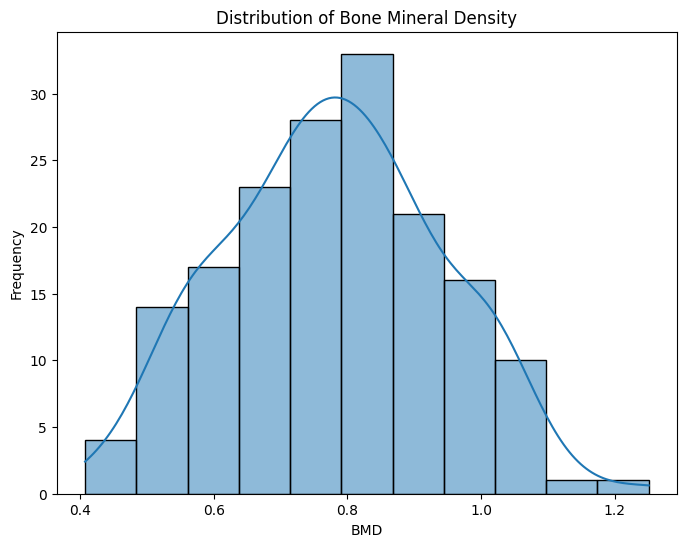

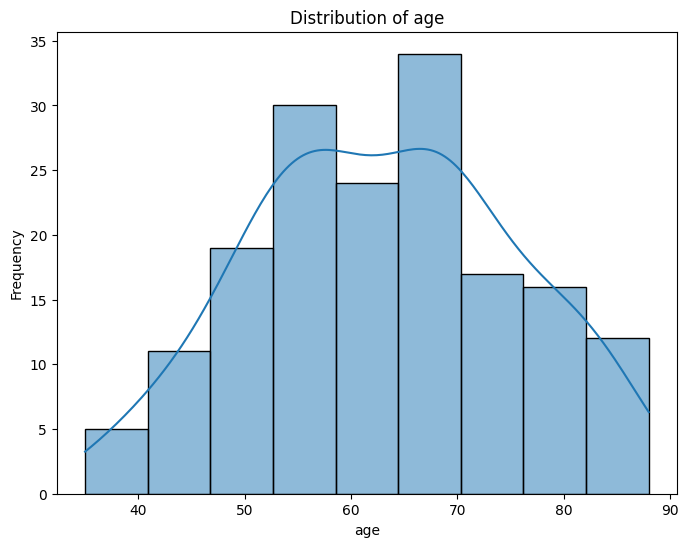

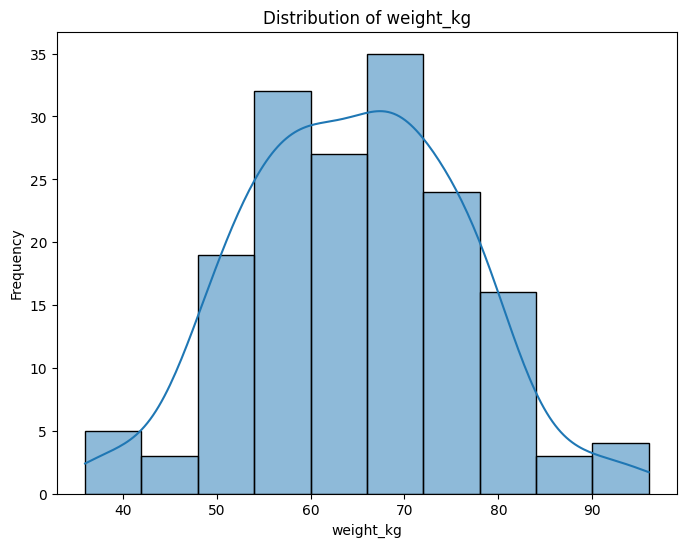

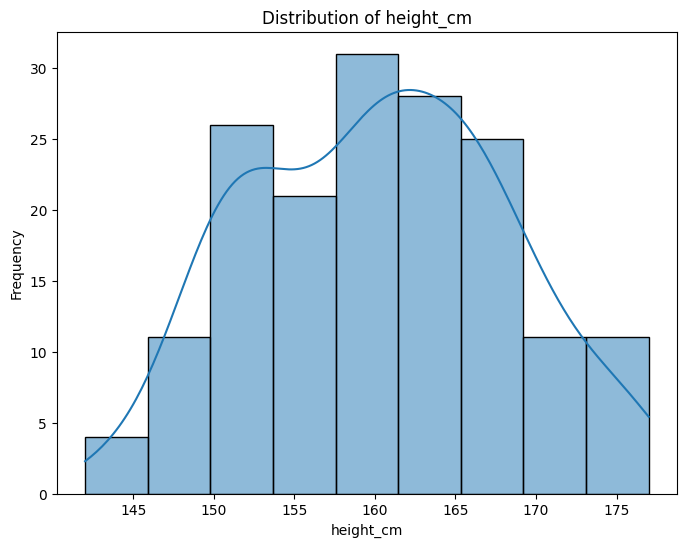

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df_no_outliers['bmd'], kde=True)
plt.title('Distribution of Bone Mineral Density')
plt.xlabel('BMD')
plt.ylabel('Frequency')
plt.show()

numerical_features = ['age', 'weight_kg', 'height_cm']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_no_outliers[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

As we are using Logistic Regression we are going to do standard Scalar and also pickle the file

In [ ]:
df_no_outliers.head()

,age,sex,fracture,weight_kg,height_cm,medication,bmd
0,57,0,1,64.0,155.5,0,0.8793
1,75,0,1,78.0,162.0,2,0.7946
2,70,1,1,73.0,170.5,2,0.9067
3,78,0,1,60.0,148.0,2,0.7112
4,54,1,1,55.0,161.0,2,0.7909


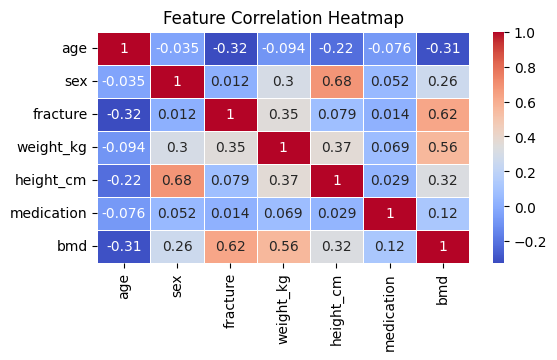

In [ ]:
plt.figure(figsize=(6, 3))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define Features and Target
X = df_no_outliers.drop(columns=['fracture'])  # Features
y = df_no_outliers['fracture']  # Target Variable

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model (Since it's a classification problem)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
with open('BMD_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!


In [ ]:
with open('BMD_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)
predictions = loaded_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

In [ ]:
print(f"Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")

Model Performance Metrics:
Mean Absolute Error (MAE): 0.21
Mean Squared Error (MSE): 0.21
Root Mean Squared Error (RMSE): 0.45
R-squared (R2): -0.1442


In [ ]:
df_no_outliers.columns

Index(['age', 'sex', 'fracture', 'weight_kg', 'height_cm', 'medication',
       'bmd'],
      dtype='object')

In [ ]:
import pandas as pd
new_data = pd.DataFrame({
    'age': [30],
    'sex': [1],
    'weight_kg': [70],
    'height_cm': [175],
    'medication': [0],
    'bmd':[1]
})
new_data_scaled = loaded_scaler.transform(new_data)
new_prediction = loaded_model.predict(new_data_scaled)
print(f"Predicted Fracture Risk: {new_prediction[0]}")

Predicted Fracture Risk: 1
